# GPU availability

In [1]:
!pip install tf_keras
# Installs Keras 2

import os
os.environ['TF_USE_LEGACY_KERAS'] = '1'
# Sets environment variable to ensure TensorFlow uses tf_keras

!pip install pyyaml h5py

In [2]:
# prompt: install ktrain

!pip install ktrain


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 4.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 42.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 27.1 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.41.4-py3-none-any.whl size=25316934 sha256=269fc30a7ec7d73ae6e92087512843c8beb152eb0fa7b724f84a23a05c86dca8
  Stored in directory: /root/.cache/pip/wheels/fa/6a/9c/8a873b

In [3]:
# '''
import tensorflow as tf
from tensorflow.python.client import device_lib
def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())
# '''

['/device:GPU:0']


# Free GPU Memory

In [4]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
import skimage
from skimage.io import imread, imshow


import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import operator
import tensorflow as tf
import random
import skimage
from skimage.io import imread, imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import ktrain


# Libraries

# Directory and params

In [6]:
# prompt: import data from drive

#from google.colab import drive
#drive.mount('/content/drive')


In [7]:

height = 210
width = 210
crop = 210

best_model_name = 'MIMB_ResNet50_F1_loss.h5'
factor=0.93
patience=2
epoch=200

#'''
'''Baseline path'''
TRAIN_PATH = r'/kaggle/input/moderate-imbalance/Train - 1 to 10 ratio/enhanced'
#VAL_PATH = r'../input/5x-aug/Aug_5x/val'
BATCH_SIZE=10
r = 4
c = 4
#'''

# Crop

In [8]:
def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

def crop_generator(batches, crop_length):
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = crop_center(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

# Data generator

In [9]:

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
                                  #featurewise_center=True,
                                  #featurewise_std_normalization=True,
                                  #validation_split=0.1)
train_batches = train_datagen.flow_from_directory(TRAIN_PATH,
                                                  class_mode='binary',
                                                  color_mode="rgb",
                                                  batch_size=BATCH_SIZE,
                                                  target_size=(450, 450),
                                                  shuffle=True,
                                                  seed=42
                                                  )

train_crops = crop_generator(train_batches, crop)


Found 3727 images belonging to 2 classes.


# Visulaize

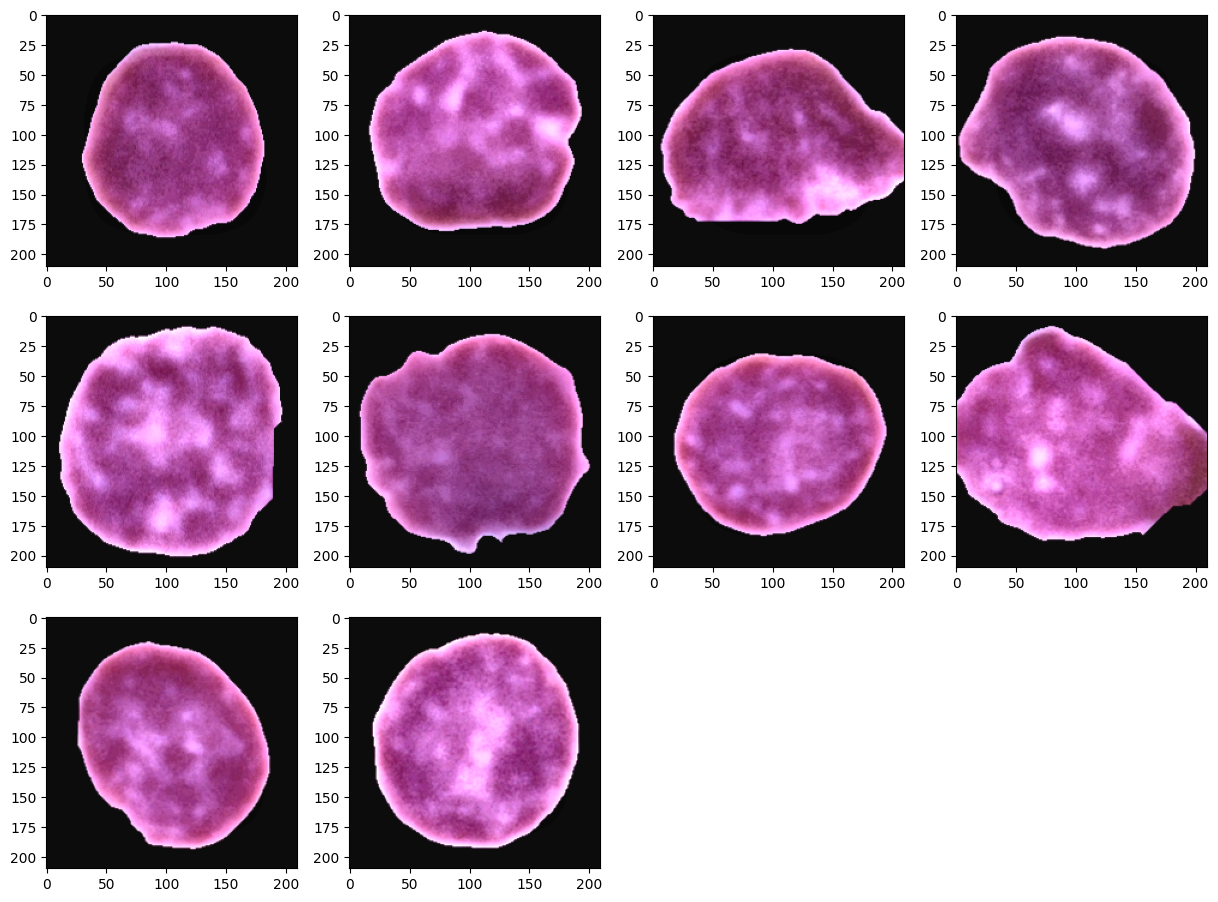

In [10]:

train_crops
x , y = next(train_crops)
plt.figure(figsize=(15,15))
i=0
for img in x:
    plt.subplot(r,c,i+1)
    plt.imshow(img)
    i+=1


255 8


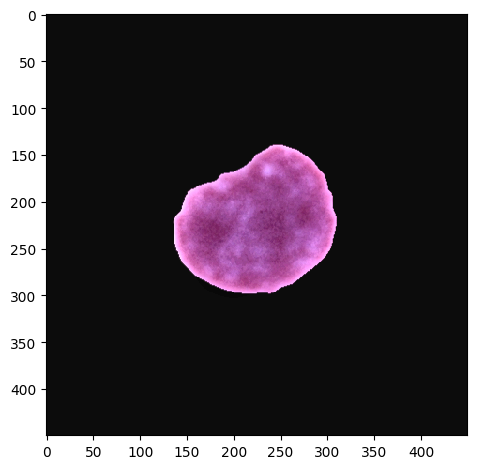

In [11]:
import skimage
from skimage.io import imread, imshow
import numpy as np

img = imread(r'/kaggle/input/moderate-imbalance/Test/enhanced/hem/1002.bmp')
imshow(img)
print(np.max(img), np.min(img))

# All models.
## One used at a time. so commented out rest of them.

In [12]:
from keras.models import Model, Sequential
#from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten # Use tf.keras.layers instead
from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import Input, GlobalAveragePooling2D

'''
import tensorflow as tf
base_model = tf.keras.applications.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(height,width,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
x = base_model.output
x = Flatten()(x)
x = Dense(4096, activation=tf.nn.sigmoid)(x)
x = Dense(4096, activation=tf.nn.sigmoid)(x)
prediction = Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(inputs=base_model.input,outputs=prediction)

model.summary()
'''


#'''
import tensorflow as tf
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(height,width,3),
    pooling=None,
    classes=1,
    classifier_activation="sigmoid",
)
x = base_model.output
x = GlobalAveragePooling2D()(x)
prediction = Dense(1, activation=tf.nn.sigmoid)(x)

model = tf.keras.Model(inputs=base_model.input,outputs=prediction)
model.summary()
#'''

'''
from keras.applications import DenseNet121

base_model = DenseNet121(weights=None,
                         include_top=False,
                         input_tensor=None,
                         input_shape=(height,width,3),
                        )
x = base_model.output
x = GlobalAveragePooling2D()(x)
# x = Dense(1024, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
# x = Dense(512, kernel_regularizer=l2(0.0001), bias_regularizer=l2(0.0001))(x)
# x = BatchNormalization()(x)
# x = Activation("relu")(x)
# x = Dropout(0.5)(x)
prediction = Dense(1, activation=tf.nn.sigmoid)(x)

model = Model(inputs=base_model.input,outputs=prediction)
model.summary()
'''


'''
def get_model():
    base_model = tf.keras.applications.EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_tensor=None,
        input_shape=(height,width,3),
        pooling=None,
        classes=1,
        classifier_activation="sigmoid",
    )
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    prediction = Dense(1, activation=tf.nn.sigmoid)(x)

    model = Model(inputs=base_model.input,outputs=prediction)
    #model.compile(loss=[mcc_loss], optimizer='adam', metrics=['accuracy'])
    return model
model = get_model()
model.summary()
'''

94765736/94765736 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 210, 210, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 216, 216, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 105, 105, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 105, 105, 64)         256       ['conv1_conv[0][0]']          
 on)                         

'\ndef get_model():\n    base_model = tf.keras.applications.EfficientNetB0(\n        include_top=False,\n        weights=\'imagenet\',\n        input_tensor=None,\n        input_shape=(height,width,3),\n        pooling=None,\n        classes=1,\n        classifier_activation="sigmoid",\n    )\n    x = base_model.output\n    x = GlobalAveragePooling2D()(x)\n    x = Dropout(0.5)(x)\n    prediction = Dense(1, activation=tf.nn.sigmoid)(x)\n\n    model = Model(inputs=base_model.input,outputs=prediction)\n    #model.compile(loss=[mcc_loss], optimizer=\'adam\', metrics=[\'accuracy\'])\n    return model\nmodel = get_model()\nmodel.summary()\n'

# F-1 loss

In [13]:

def f1_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return 1 - K.mean(f1)


# MCC loss

In [14]:

import tensorflow as tf
from tensorflow.keras import backend as K

def mcc_loss(y_true, y_pred):

    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0) * 1e2
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0) / 1e2

    up = tp*tn - fp*fn
    down = K.sqrt((tp+fp) * (tp+fn) * (tn+fp) * (tn+fn))

    mcc = up / (down + K.epsilon())
    mcc = tf.where(tf.math.is_nan(mcc), tf.zeros_like(mcc), mcc)

    return 1 - K.mean(mcc)


# Compile.
### Different loss used in this work. At a time commneted out rest of them while keepeing one intact

In [15]:

import tensorflow as tf
#import tensorflow_addons as tfa

adam_opt = tf.keras.optimizers.Adam(learning_rate=1e-3, beta_1=0.0, beta_2=0.0, amsgrad=True)


model.compile(optimizer= adam_opt,
              #loss = 'binary_crossentropy',
              #loss = [binary_focal_loss(alpha=.25, gamma=2)],
              loss = [f1_loss],
              #loss = [mcc_loss],
              #loss = [mod_mcc_loss],
              #loss = tfa.losses.SigmoidFocalCrossEntropy(),
              metrics=['accuracy'])

In [16]:
checkpoint_path = "/kaggle/input/moderate-imbalance/Train - 1 to 10 ratio/cp-{epoch:04d}.weights.h5" # Since you're only saving weights, you should use the .weights.h5 extension. If you're saving the whole model, you would use the .keras extension instead
checkpoint_dir = os.path.dirname(checkpoint_path)



In [17]:
import keras
import tensorflow.keras as keras
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf
best_model_name = best_model_name
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(best_model_name, monitor='accuracy', save_best_only=True, mode='max', save_freq=5),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='accuracy', factor=factor, verbose=1, patience=patience, mode='max'),
    tf.keras.callbacks.EarlyStopping(patience=5, verbose=1)]


# Run

In [18]:
#model.load_weights(best_model_name)

In [19]:
'''history = model.fit(x_train, y_train, validation_split=0.1, shuffle=True, batch_size=10, epochs=100, callbacks = callbacks)'''

history  = model.fit(train_crops,
         steps_per_epoch=train_batches.n//train_batches.batch_size,
         epochs=epoch,
         verbose=1,
         #class_weight={0:5.51331361, 1:0.54986722},
         callbacks = callbacks)

Epoch 1/200


I0000 00:00:1727969325.121411     209 service.cc:145] XLA service 0x7f2eaa897dc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727969325.121461     209 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1727969325.269323     209 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


  4/372 [..............................] - ETA: 30s - loss: 0.1586 - accuracy: 0.8000  

/opt/conda/lib/python3.10/site-packages/tf_keras/src/engine/training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


372/372 [==============================] - 156s 234ms/step - loss: 0.0516 - accuracy: 0.9072 - lr: 0.0010
Epoch 2/200
372/372 [==============================] - 40s 108ms/step - loss: 0.0502 - accuracy: 0.9091 - lr: 0.0010
Epoch 3/200
372/372 [==============================] - 31s 79ms/step - loss: 0.0499 - accuracy: 0.9096 - lr: 0.0010
Epoch 4/200
372/372 [==============================] - 30s 79ms/step - loss: 0.0501 - accuracy: 0.9091 - lr: 0.0010
Epoch 5/200
372/372 [==============================] - 29s 79ms/step - loss: 0.0493 - accuracy: 0.9101 - lr: 0.0010
Epoch 6/200
372/372 [==============================] - 29s 79ms/step - loss: 0.0506 - accuracy: 0.9080 - lr: 0.0010
Epoch 7/200
372/372 [==============================] - ETA: 0s - loss: 0.0501 - accuracy: 0.9088
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.0009300000441726298.
372/372 [==============================] - 30s 79ms/step - loss: 0.0501 - accuracy: 0.9088 - lr: 0.0010
Epoch 8/200
372/372 [===============

In [20]:
os.listdir(checkpoint_dir)
model.save('my_model_f1loss.keras')

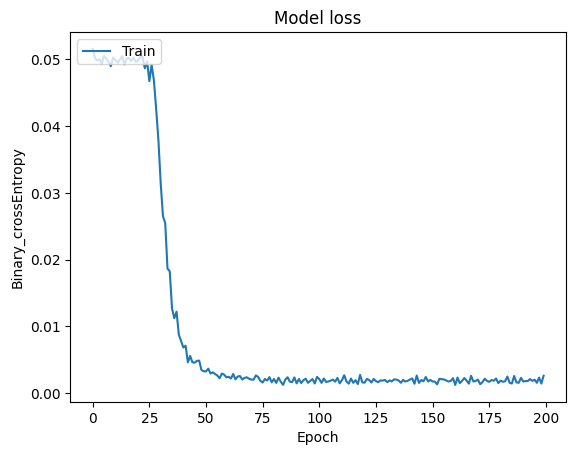

In [21]:
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Binary_crossEntropy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

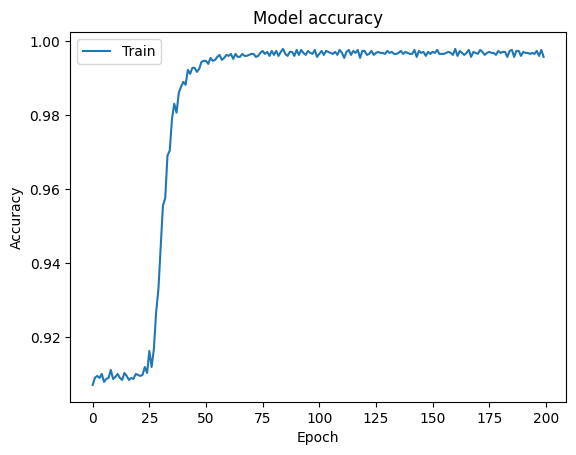

In [22]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Stats

In [23]:
print('Lowest training loss: ', min(history.history['loss']))

print('Highest training accuracy: ', max(history.history['accuracy']))


Lowest training loss:  0.0012406976893544197
Highest training accuracy:  0.9978477358818054


# Prediction

In [24]:


val_all_path = r'/kaggle/input/moderate-imbalance/Test/enhanced/all'
val_hem_path = r'/kaggle/input/moderate-imbalance/Test/enhanced/hem'

val_all_list = os.listdir(val_all_path)
#val_all_list.sort()

val_hem_list = os.listdir(val_hem_path)
#val_hem_list.sort()


print('val/all_list_length: ', len(val_all_list))
print('val/hem_list_length :', len(val_hem_list))

val_all_batch = np.zeros((len(val_all_list), height, width, 3), dtype=np.uint8)
val_hem_batch = np.zeros((len(val_hem_list), height, width, 3), dtype=np.uint8)

print('val_all_batch shape: ', val_all_batch.shape, 'val_hem_batch shape: ', val_hem_batch.shape)


def Read_n_Crop(list_data, batch, path):
    i=0
    for x in list_data:
        image = cv2.imread(os.path.join(path, x))
        image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image = crop_center(image, (height,width,3))
        batch[i] = image
        i+=1

    print('batch type: ', type(batch), 'batch shape: ', batch.shape, 'batch dtype: ', batch.dtype, 'batch[0] shape: ', batch[0].shape, 'batch[0] dtype: ', batch[0].dtype)
    return batch


def crop_center(img, bounding):
    start = tuple(map(lambda a, da: a//2-da//2, img.shape, bounding))
    end = tuple(map(operator.add, start, bounding))
    slices = tuple(map(slice, start, end))
    return img[slices]

parasite_images=Read_n_Crop(val_all_list, val_all_batch, val_all_path)
uninf_images=Read_n_Crop(val_hem_list, val_hem_batch, val_hem_path)


para_label = np.array([0 for _ in range(len(parasite_images))])
uninf_label = np.array([1 for _ in range(len(uninf_images))])

print('parasite/all_label shape: ', para_label.shape, 'uninf_label shape: ', uninf_label.shape)

x_all = np.concatenate((parasite_images, uninf_images), axis=0)
y_all = np.concatenate((para_label, uninf_label), axis=0)
print('After concatenation.............................')
print('x_all shape: ', x_all.shape, 'y_all shape: ', y_all.shape)

########
'''Model imports here'''
#model = tf.keras.models.load_model(best_model_name)
model.load_weights(os.path.join(os.getcwd(), best_model_name))
########

x_all=x_all/255.0
# Make predictions using trained model
y_pred = model.predict(x_all, verbose=1)
print("Predictions: ", y_pred.shape)

y_pred_flat = []
for pred in y_pred:
    if pred > 0.5:
        y_pred_flat.append(1)
    else:
        y_pred_flat.append(0)
y_pred_flat = np.array(y_pred_flat)

val/all_list_length:  1219
val/hem_list_length : 648
val_all_batch shape:  (1219, 210, 210, 3) val_hem_batch shape:  (648, 210, 210, 3)
batch type:  <class 'numpy.ndarray'> batch shape:  (1219, 210, 210, 3) batch dtype:  uint8 batch[0] shape:  (210, 210, 3) batch[0] dtype:  uint8
batch type:  <class 'numpy.ndarray'> batch shape:  (648, 210, 210, 3) batch dtype:  uint8 batch[0] shape:  (210, 210, 3) batch[0] dtype:  uint8
parasite/all_label shape:  (1219,) uninf_label shape:  (648,)
After concatenation.............................
x_all shape:  (1867, 210, 210, 3) y_all shape:  (1867,)
59/59 [==============================] - 10s 58ms/step
Predictions:  (1867, 1)


# Classification report

In [25]:
print('Samples classified as all / 1219: ', y_pred_flat.tolist().count(0))
print('Samples classified as hem / 648: ', y_pred_flat.tolist().count(1))

Samples classified as all / 1219:  0
Samples classified as hem / 648:  1867


In [26]:
np.unique(y_pred_flat)

array([1])

In [27]:
print(y_pred_flat.tolist().count(0), y_pred_flat.tolist().count(1))

0 1867


In [28]:
from sklearn.metrics import confusion_matrix, classification_report

# Classification report

confusion_mtx = confusion_matrix(y_all, y_pred_flat)
print(confusion_mtx)
target_names = ['0', '1']
report = classification_report(y_all, y_pred_flat, target_names=target_names, digits=4)
print(classification_report(y_all, y_pred_flat, target_names=target_names, digits=4))

[[   0 1219]
 [   0  648]]
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1219
           1     0.3471    1.0000    0.5153       648

    accuracy                         0.3471      1867
   macro avg     0.1735    0.5000    0.2577      1867
weighted avg     0.1205    0.3471    0.1789      1867



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

# Save model and stats

In [29]:
import os

report_list = report.split()
for x in range(len(report_list)):
    if report_list[x] == 'accuracy':
        acc = report_list[x+1]
    elif report_list[x] == 'weighted':
        precision = report_list[x+2]
        recall = report_list[x+3]
        f1 = report_list[x+4]
print(acc, precision, recall, f1)

log_path = '/kaggle/working/'
filename = best_model_name[:-2] + 'txt'#'baseline_run_3.txt'
f = open(os.path.join(log_path, filename), "w")

content = best_model_name + '\n\n'  + 'Location: roksana pc' + '\n' + 'Moderate Imbalance' + '\n' + 'Train-path=enhanced' + '\n' + 'Test-path=enhanced' + '\n\n' + 'height: ' + str(height) + '\t' + 'width: ' + str(width) + '\t' + 'crop: ' + str(crop) + '\n\n' + 'factor: ' + str(factor) + '\t' + 'patience: ' + str(patience) + '\t' + 'epoch: ' + str(epoch) + '\n\n' +'Lowest Training Loss: ' + str(min(history.history['loss'])) + '\n' +'Highest training accuracy: ' + str(max(history.history['accuracy'])) + '\n\n' + 'Accuracy: ' + str(acc) + '\t' + 'Precision: ' + str(precision) + '\t' + 'Recall: ' + str(recall) + '\t' + 'F1-score: ' + str(f1) + '\n\n' + 'all: ' + str(confusion_mtx[0]) + '\n\n' + 'hem: ' + str(confusion_mtx[1]) +  '\n      all hem'



f.write(content)
f.close()


0.3471 0.1205 0.3471 0.1789
